In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Preprocessing
First read the housing price data set.

In [3]:
"""
dat = pd.read_csv('13_Tokyo_20053_20163.csv', sep=',', header=None, 
                 names=('id','type','chiiki','jiscode','ken','shi','chiku','eki','ekikyori',
                        'price','unit_price','madori','menseki','unit_price2','keijo',
                        'maguchi','nobeyuka','kenchikunen','kouzou','youto','mokuteki','dourohoui',
                        'dourotype','douro_fukuin','toshikeikaku','kenpeiritsu',
                        'yousekiritsu','torihiki_jiten','bikou'),
                 dtype={'id':np.int, 'type':np.str, 'chiiki':np.str, 'jiscode':np.str, 'ken':np.str, 'shi':np.str, 'chiku':np.str, 'eki':np.str,
                       'ekikyori':np.float32, 'price':np.float32, 'unit_price':np.float32, 'madori':np.str, 'menseki':np.float32, 'unit_price2':np.float32,
                       'keijo':np.str, 'maguchi':np.str, 'nobeyuka':np.float32, 'kenchikunen':np.str, 'kouzou':np.str, 'youto':np.str, 'mokuteki':np.str,
                       'dourohoui':np.str, 'dourotype':np.str, 'douro_fukuin':np.str, 'toshikeikaku':np.str, 'kenpeiritsu':np.float32, 
                       'yousekiritsu':np.float32, 'torihiki_jiten':np.str, 'bikou':np.str})
"""
dat = pd.read_csv('13_Tokyo_20053_20163.csv', sep=',', header=None, index_col='id',
                 names=('id','type','chiiki','jiscode','ken','shi','chiku','eki','ekikyori',
                        'price','unit_price','madori','menseki','unit_price2','keijo',
                        'maguchi','nobeyuka','kenchikunen','kouzou','youto','mokuteki','dourohoui',
                        'dourotype','douro_fukuin','toshikeikaku','kenpeiritsu',
                        'yousekiritsu','torihiki_jiten','bikou'),
                 dtype='object')

In [4]:
dat.head(3)

,type,chiiki,jiscode,ken,shi,chiku,eki,ekikyori,price,unit_price,...,youto,mokuteki,dourohoui,dourotype,douro_fukuin,toshikeikaku,kenpeiritsu,yousekiritsu,torihiki_jiten,bikou
id,,,,,,,,,,,,,,,,,,,,,
1,中古マンション等,NaN,13101,東京都,千代田区,飯田橋,飯田橋,1,51000000,NaN,...,住宅,住宅,NaN,NaN,NaN,商業地域,80,600,平成28年第３四半期,未改装を購入
2,宅地(土地と建物),商業地,13101,東京都,千代田区,飯田橋,飯田橋,5,300000000,NaN,...,その他,住宅,北東,区道,5.0,商業地域,80,500,平成28年第１四半期,NaN
3,宅地(土地と建物),商業地,13101,東京都,千代田区,飯田橋,飯田橋,4,170000000,NaN,...,事務所、倉庫,住宅,北東,区道,4.0,商業地域,80,700,平成28年第１四半期,NaN


In [5]:
d = dat[(dat.type=='中古マンション等') & (dat.youto=='住宅')]
d.groupby('ekikyori')['type'].count()

ekikyori
0           1127
1           5273
10          6702
11          6257
12          3538
13          3999
14          3058
15          2917
16          2184
17           620
18          1419
19          1071
1H30?2H        8
1H?1H30       81
2           7886
20           818
21           575
22           172
23           576
24           389
25           372
26           243
27            59
28           223
29           204
2H?           16
3          11317
30分?60分     1075
4          12681
5          11617
6          13151
7           9143
8          10375
9           8970
Name: type, dtype: int64

# Converting each column into the right format
We read all the variables as 'object.' We convert some columns into values where appropriate.

'ekikyori' takes integer for most records, and we can see '1H30' and '30分'. We will convert to a value

In [6]:
d.loc[d.ekikyori=='30分?60分', 'ekikyori'] = '60'
d.loc[d.ekikyori=='2H?', 'ekikyori'] = '120'
d.loc[d.ekikyori=='1H30?2H', 'ekikyori'] = '120'
d.loc[d.ekikyori=='1H?1H30', 'ekikyori'] = '90'

//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernela

In [7]:
d.ekikyori = pd.to_numeric(d.ekikyori)
d.menseki = pd.to_numeric(d.menseki)
d.kenpeiritsu = pd.to_numeric(d.kenpeiritsu)/100.0
d.yousekiritsu = pd.to_numeric(d.yousekiritsu)/100.0

//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [8]:
d.price = pd.to_numeric(d.price)

//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [9]:
d.iloc[:3, 25:30]

,yousekiritsu,torihiki_jiten,bikou
id,,,
1,6.0,平成28年第３四半期,未改装を購入
4,5.0,平成28年第１四半期,未改装を購入
5,7.0,平成28年第１四半期,未改装を購入


In [10]:
d.groupby('bikou')['type'].count()
# remove
# unit_price
# unit_price2
# keijo
# maguchi
# nobeyuka
# dourohoui
# dourotype
# douro_fukuin

bikou
その他事情有り                        1
他の権利・負担付き                      1
他の権利・負担付き、改装済を購入               4
他の権利・負担付き、未改装を購入              15
他の権利・負担付き、調停・競売等、未改装を購入        1
改装済を購入                     32550
改装済を購入、その他事情有り                 4
未改装を購入                     88887
未改装を購入、その他事情有り                22
瑕疵有りの可能性、改装済を購入                3
瑕疵有りの可能性、未改装を購入                6
調停・競売等                       457
調停・競売等、改装済を購入                101
調停・競売等、未改装を購入               2479
関係者間取引                        14
関係者間取引、改装済を購入                 31
関係者間取引、未改装を購入                191
Name: type, dtype: int64

From 'bikou' column, we can find if the apartment was reformed or not, the transaction between two professional dealers.

In [11]:
d['is_reformed'] = [1 if x in (['他の権利・負担付き、改装済を購入','改装済を購入','改装済を購入、その他事情有り',
                               '瑕疵有りの可能性、改装済を購入','調停・競売等、改装済を購入','関係者間取引、改装済を購入']) else 0 for x in d.bikou]
d['is_not_reformed'] = [1 if x in (['他の権利・負担付き、未改装を購入','他の権利・負担付き、調停・競売等、未改装を購入','未改装を購入',
                               '未改装を購入、その他事情有り','瑕疵有りの可能性、未改装を購入','調停・競売等、未改装を購入',
                                   '関係者間取引、未改装を購入']) else 0 for x in d.bikou]
d['is_auction'] = [1 if x in ['調停・競売等','調停・競売等、改装済を購入','調停・競売等、未改装を購入'] else 0 for x in d.bikou]
d['is_direct_transaction'] = [1 if x in ['関係者間取引','関係者間取引、改装済を購入','関係者間取引、未改装を購入'] else 0 for x in d.bikou]


//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

We need to convert 'torihiki_jiten' (transaction date) and 'kenchikunen' (year of built). These are denoted by gengou.

In [12]:
print(d.groupby('kenchikunen')['type'].count())

kenchikunen
平成10年    4510
平成11年    4523
平成12年    5419
平成13年    4607
平成14年    5124
平成15年    5874
平成16年    5733
平成17年    6856
平成18年    6592
平成19年    5593
平成20年    5138
平成21年    4469
平成22年    2840
平成23年    1867
平成24年    2009
平成25年    1290
平成26年    1110
平成27年    1091
平成28年     147
平成2年     2299
平成3年     2924
平成4年     2330
平成5年     1339
平成6年     1909
平成7年     3145
平成8年     3341
平成9年     3565
平成元年     2242
戦前        123
昭和21年       5
         ... 
昭和34年      14
昭和35年       4
昭和36年      10
昭和37年      10
昭和38年      26
昭和39年      63
昭和40年      76
昭和41年     146
昭和42年     170
昭和43年     474
昭和44年     690
昭和45年    1204
昭和46年    1495
昭和47年    1307
昭和48年    1323
昭和49年    1666
昭和50年     824
昭和51年    1002
昭和52年    1013
昭和53年    1734
昭和54年    1983
昭和55年    1805
昭和56年    1465
昭和57年    1692
昭和58年    1649
昭和59年    3426
昭和60年    2728
昭和61年    2221
昭和62年    2452
昭和63年    2665
Name: type, dtype: int64


We make a list of years manually.

In [13]:
gengou = []
gengou.append("戦前")
shouwa = range(21, 64)
for yr in shouwa:
    gengou.append("昭和"+np.str(yr)+"年")
# 平成元年
gengou.append("平成元年")
# 平成２年以降
heisei = range(2, 30)
for yr in heisei:
    gengou.append("平成"+np.str(yr)+"年")
seireki = range(1945, 2018) 
kenchikunen = {k: v for k, v in zip(gengou, seireki)}
# {平成２８年: 2016, 昭和５４年: 1979, ...}


We now change the kenchikunen in the data set. But kenchikunen has 3025 null values, so we need to delete those records.

In [14]:
d.isnull().sum()

type                          0
chiiki                   136394
jiscode                       0
ken                           0
shi                           0
chiku                        44
eki                         283
ekikyori                   8278
price                         0
unit_price               136394
madori                     4034
menseki                       0
unit_price2              136394
keijo                    136394
maguchi                  136394
nobeyuka                 136394
kenchikunen                3025
kouzou                     1033
youto                         0
mokuteki                 102656
dourohoui                136394
dourotype                136394
douro_fukuin             136394
toshikeikaku               2441
kenpeiritsu                2986
yousekiritsu               2986
torihiki_jiten                0
bikou                     11627
is_reformed                   0
is_not_reformed               0
is_auction                    0
is_direc

In [15]:
d['kenchiku_year'] = [np.nan if pd.isnull(y) else kenchikunen[y] for y in d.kenchikunen]
d[['kenchikunen', 'kenchiku_year']].head(5)

//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,kenchikunen,kenchiku_year
id,,
1,昭和59年,1984.0
4,平成19年,2007.0
5,昭和57年,1982.0
6,平成19年,2007.0
10,平成11年,1999.0


From the kenchiku_year, we can calculate the age of the apartment as of the transaction date. The transaction quarter is available in the data set, so we take the difference between the two years.

In [16]:
d['transaction_year'] = [kenchikunen[v[:5]] for v in d.torihiki_jiten]
d[['torihiki_jiten', 'transaction_year']].head(5)
#for x in d.torihiki_jiten[:10]:
#    print(x[:5], kenchikunen[x[:5]])

//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,torihiki_jiten,transaction_year
id,,
1,平成28年第３四半期,2016
4,平成28年第１四半期,2016
5,平成28年第１四半期,2016
6,平成28年第１四半期,2016
10,平成27年第４四半期,2015


In [17]:
d['age'] = np.maximum(d.transaction_year - d.kenchiku_year, 0)
print(d.age[:20])

id
1     32.0
4      9.0
5     34.0
6      9.0
10    16.0
11    31.0
12    33.0
13     8.0
14    31.0
16    31.0
17     8.0
18    30.0
19     NaN
20     2.0
21    31.0
22    11.0
23     7.0
24     7.0
25    11.0
26    30.0
Name: age, dtype: float64


//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


The price can take a large value, ranging from one million yen. We take the log of the price.

In [18]:
d['price_log10'] = np.log10(d.price)

//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


We now save the data set into pickle so we can re-start easily.

In [19]:
# remove useless columns
d.isnull().sum()/d.shape[0] # ratio of null values
# chiiki, unit_price, unit_price2, keijo, maguchi, nobeyuka, dourohoui, dourotype, douro_fukuin are all NaN
d = d.drop(['chiiki','unit_price','unit_price2','keijo','maguchi','nobeyuka','dourohoui','dourotype','douro_fukuin'], axis=1)

In [20]:
d.head(3)
# type is all apartment, and ken is Tokyo. so we remove these too.
d = d.drop(['type','ken'], axis=1)

We are going to use one year of records as the training data set, the next one quarter as the validation and the next one quarter as the test data set.

The dataset includes null values. We count the number of blank records for each column.

In [21]:
d[d.transaction_year>=2015].isnull().sum()

jiscode                     0
shi                         0
chiku                       0
eki                         2
ekikyori                   47
price                       0
madori                   1062
menseki                     0
kenchikunen               751
kouzou                     90
youto                       0
mokuteki                 1232
toshikeikaku              196
kenpeiritsu               268
yousekiritsu              268
torihiki_jiten              0
bikou                    3131
is_reformed                 0
is_not_reformed             0
is_auction                  0
is_direct_transaction       0
kenchiku_year             751
transaction_year            0
age                       751
price_log10                 0
dtype: int64

## Dummy variables
We need to convert character variables by one-hot encoding. First check what variables need to be converted.
* shi
* chiku
* eki
* madori
* kenchikunen
* kouzou
* youto
* mokuteki
* toshikeikaku
* bikou

Kenchikunen is already conveted to age variable. bikou is converted into is_reformed, is_direct_sales and is_aucition. The rest of the variables will be converted by pandas.get_dummies function. In order to avoid the indistinguishable problem, we drop one of the factors.

In [89]:
d[['shi','chiku','eki','madori','kenchikunen','kouzou','youto','mokuteki','toshikeikaku','bikou']].head(10)

,shi,chiku,eki,madori,kenchikunen,kouzou,youto,mokuteki,toshikeikaku,bikou
id,,,,,,,,,,
1,千代田区,飯田橋,飯田橋,２ＬＤＫ,昭和59年,ＳＲＣ,住宅,住宅,商業地域,未改装を購入
4,千代田区,飯田橋,飯田橋,２ＬＤＫ,平成19年,ＲＣ,住宅,住宅,商業地域,未改装を購入
5,千代田区,飯田橋,飯田橋,１Ｋ,昭和57年,ＳＲＣ,住宅,事務所,商業地域,未改装を購入
6,千代田区,飯田橋,飯田橋,３ＬＤＫ,平成19年,ＲＣ,住宅,住宅,商業地域,未改装を購入
10,千代田区,飯田橋,飯田橋,１ＤＫ,平成11年,ＳＲＣ,住宅,住宅,商業地域,改装済を購入
11,千代田区,飯田橋,飯田橋,NaN,昭和59年,ＳＲＣ,住宅,住宅,商業地域,未改装を購入
12,千代田区,飯田橋,飯田橋,２ＤＫ,昭和57年,ＳＲＣ,住宅,住宅,商業地域,改装済を購入
13,千代田区,飯田橋,飯田橋,１ＬＤＫ,平成19年,ＲＣ,住宅,住宅,商業地域,未改装を購入
14,千代田区,飯田橋,飯田橋,２ＬＤＫ,昭和59年,ＳＲＣ,住宅,住宅,商業地域,未改装を購入


### Toshikeikaku
Toshikeikaku (zoning) has 10 categories. https://en.wikipedia.org/wiki/Zoning#Japan

It shows whether the area can be used for what types of building and the shape of the area.

In [101]:
d.groupby('toshikeikaku')['eki'].count().reset_index(name='count').sort_values(['count'], ascending=False)

,toshikeikaku,count
0,商業地域,41998
4,準工業地域,25024
6,第１種中高層住居専用地域,17447
12,近隣商業地域,17369
8,第１種住居地域,13511
11,第２種住居地域,4828
7,第１種低層住居専用地域,4738
9,第２種中高層住居専用地域,3302
3,準住居地域,2698
1,工業地域,2600


準都市計画区域 has only one count, so we drop this.

In [125]:
zoning = pd.get_dummies(d.toshikeikaku, prefix='zoning')
print(zoning.columns)
zoning = zoning.drop(['zoning_準都市計画区域'], axis=1)

Index(['zoning_商業地域', 'zoning_工業地域', 'zoning_工業専用地域', 'zoning_準住居地域',
       'zoning_準工業地域', 'zoning_準都市計画区域', 'zoning_第１種中高層住居専用地域',
       'zoning_第１種低層住居専用地域', 'zoning_第１種住居地域', 'zoning_第２種中高層住居専用地域',
       'zoning_第２種低層住居専用地域', 'zoning_第２種住居地域', 'zoning_近隣商業地域'],
      dtype='object')


### Youto & Mokuteki
As we already filtered youto = '住宅' it has only one value and no need to convert to dummy variable. Mokuteki has four levels; housing, office, shop and other.


In [128]:
d.groupby('mokuteki')['eki'].count().reset_index(name='count').sort_values(['count'], ascending=False)

,mokuteki,count
2,住宅,30867
0,その他,2464
1,事務所,395
3,店舗,10


In [130]:
purpose = pd.get_dummies(d.mokuteki, prefix='purpose')
purpose = purpose.drop(['purpose_店舗'], axis=1)
purpose.columns

Index(['purpose_その他', 'purpose_事務所', 'purpose_住宅'], dtype='object')

### Kouzou
We have Reinforced-Concrete (RC), steel reinforced concrete (SRC), Steel, and a combination of these.

In [132]:
d.groupby('kouzou')['eki'].count().reset_index(name='count').sort_values(['count'], ascending=False)

,kouzou,count
3,ＲＣ,90901
6,ＳＲＣ,43072
2,鉄骨造,1025
8,ＳＲＣ、ＲＣ,77
5,ＲＣ、鉄骨造,58
1,軽量鉄骨造,8
0,木造,7
4,ＲＣ、木造,1
7,ＳＲＣ、鉄骨造,1


In [135]:
material = pd.get_dummies(d.kouzou, prefix='material')
material = material.drop(['material_ＳＲＣ、ＲＣ', 'material_ＲＣ、鉄骨造', 
               'material_軽量鉄骨造', 'material_木造', 'material_ＲＣ、木造', 'material_ＳＲＣ、鉄骨造'],
             axis = 1)
material.columns

Index(['material_鉄骨造', 'material_ＲＣ', 'material_ＳＲＣ'], dtype='object')

### Madori
Madori is convereted into the number of bedrooms. 

In [137]:
#print(d.groupby('madori')['torihiki_jiten'].count())
# d['bedrooms']
x=d.madori[:10].values
"""
オープンフロア      272
スタジオ          62
メゾネット          8
"""
#print(x[5])
#print(isinstance(x[5], str))
# [map(int, v[0]) for v in x]
#print(int(x[5][0]))
def numberOfRooms(madori):
    try:
        return int(madori[0])
    except TypeError:
        return 0
    except ValueError:
        return 0
numrooms = []
for x in d.madori:
    numrooms.append(numberOfRooms(x))
d['bedrooms'] = numrooms
# numberOfRooms(x[:10])
#d['bedrooms'] = [map(numberOfRooms, x) for x in d.madori]
#[map(numberOfRooms, x) for x in d.madori[:10].values]

### Shi, Chiku and Eki
We have area variables. Shi (Town), Chiku (area) and Eki (Station). First we check the distribution of these variables.

In [142]:
d.groupby('shi')['eki'].count().reset_index(name='count').sort_values(['count'], ascending=False)
#d.groupby('shi')['eki'].count().reset_index(name='count')

,shi,count
14,大田区,8555
30,江東区,7996
2,世田谷区,7812
33,港区,7776
19,新宿区,6996
9,品川区,6529
26,板橋区,6170
3,中央区,5709
40,練馬区,5601
48,足立区,5012


There are 50 values in "Shi" variable, and it stands for a name of a town. We drop 西多摩郡瑞穂町 which has the smallest sample.

In [186]:
town = pd.get_dummies(d.shi, prefix='town')
town = town.drop(['town_西多摩郡瑞穂町'], axis=1)
town.columns

Index(['town_あきる野市', 'town_三鷹市', 'town_世田谷区', 'town_中央区', 'town_中野区',
       'town_八王子市', 'town_北区', 'town_千代田区', 'town_台東区', 'town_品川区',
       'town_国分寺市', 'town_国立市', 'town_墨田区', 'town_多摩市', 'town_大田区', 'town_小平市',
       'town_小金井市', 'town_府中市', 'town_文京区', 'town_新宿区', 'town_日野市', 'town_昭島市',
       'town_杉並区', 'town_東久留米市', 'town_東大和市', 'town_東村山市', 'town_板橋区',
       'town_武蔵村山市', 'town_武蔵野市', 'town_江戸川区', 'town_江東区', 'town_清瀬市',
       'town_渋谷区', 'town_港区', 'town_狛江市', 'town_町田市', 'town_目黒区', 'town_福生市',
       'town_稲城市', 'town_立川市', 'town_練馬区', 'town_羽村市', 'town_荒川区', 'town_葛飾区',
       'town_西東京市', 'town_調布市', 'town_豊島区', 'town_足立区', 'town_青梅市'],
      dtype='object')

There are 1178 distinct values for 'chiku' variable. This represents an area of blocks inside a town. There are too many values so we ignore this variable. 

In [187]:
d.groupby('chiku')['eki'].count().reset_index(name='count').sort_values(['count'], ascending=False)
#d.groupby('chiku')['eki'].count().reset_index(name='count')

,chiku,count
620,本町,1536
120,亀戸,1222
23,三田,903
1021,西新宿,896
958,芝浦,877
268,南大井,871
997,西五反田,870
1071,赤坂,853
201,勝どき,851
668,東池袋,784


### Station
There are 626 stations. Many of them have less than ten records. Even if we limit the size greater than 100, we still have 406 stations. So we ignore station.

In [ ]:
%matplotlib inline
import matplotlib as plt
import seaborn as sns
sns.set(color_codes=True)
sns.distplot(station_count.cnt, kde=False, rug=False)
sns.plt.title('The variation of menseki in Training data set')

In [185]:
#station_count = d.groupby('eki')['chiku'].count().reset_index(name='count').sort_values(['count'], ascending=False)
station_count = d.groupby('eki')['chiku'].count().reset_index(name='cnt').sort_values(['cnt'], ascending=False)
# d.filter(d.groupby('eki')['chiku'])
station_idx = station_count.cnt >= 100
station_count[station_idx]


,eki,cnt
114,勝どき,1369
186,大森(東京),1030
387,池袋,946
429,田町(東京),916
42,両国,894
561,豊洲,890
61,亀戸,886
266,新小岩,877
438,白金高輪,875
182,大崎,843


We combine shi, kouzou, mokuteki and zoning variables into one data frame, and merge them.

In [260]:
d_dummies = pd.concat([town, material, purpose, zoning], axis=1)
d_final = pd.concat([d, d_dummies], axis=1)
d_comp = d_final.dropna(axis=0)
print(d_final.shape[0])
print(d_comp.shape[0])
print("Training:", d_final[d_final.torihiki_jiten.isin( ['平成27年第２四半期', '平成27年第３四半期','平成27年第４四半期','平成28年第１四半期'])].shape[0])
print("Training Complete cases:", d_comp[d_comp.torihiki_jiten.isin( ['平成27年第２四半期', '平成27年第３四半期','平成27年第４四半期','平成28年第１四半期'])].shape[0])
print("Validation All:", d_final[d_final.torihiki_jiten.isin( ['平成28年第２四半期'])].shape[0])
print("Testing All:", d_final[d_final.torihiki_jiten.isin( ['平成28年第３四半期'])].shape[0])



136394
27663
Training: 14733
Training Complete cases: 11479
Validation All: 3664
Testing All: 2464


### training and test data set
From the final complete data set that excluded all the NA rows, we make the training, validation and test data set based on the transaction year. 

* Training: between 2015 Q2 and 2016 Q1
* Validation: 2016 Q2
* Test: 2016 Q3

In [202]:
print(d_comp.groupby('torihiki_jiten')['shi'].count())
train = d_comp[d_comp.torihiki_jiten.isin( ['平成27年第２四半期', '平成27年第３四半期','平成27年第４四半期','平成28年第１四半期'])]
validation = d_comp[d_comp.torihiki_jiten=='平成28年第２四半期']
test = d_comp[d_comp.torihiki_jiten=='平成28年第３四半期']
print(train.shape, validation.shape, test.shape)

torihiki_jiten
平成25年第１四半期       7
平成25年第２四半期       5
平成25年第３四半期      20
平成25年第４四半期      39
平成26年第１四半期     560
平成26年第２四半期    2511
平成26年第３四半期    2617
平成26年第４四半期    2716
平成27年第１四半期    2934
平成27年第２四半期    2865
平成27年第３四半期    2846
平成27年第４四半期    2825
平成28年第１四半期    2943
平成28年第２四半期    2895
平成28年第３四半期    1880
Name: shi, dtype: int64
(11479, 93) (2895, 93) (1880, 93)


We now save the data set for the analysis.

In [203]:
import pickle
pickle.dump(d_final, open('tokyo_apartment.p', 'wb'))
pickle.dump(d_comp, open('tokyo_apartment_comp.p', 'wb'))
pickle.dump(train, open('tokyo_apartment_train.p', 'wb'))
pickle.dump(validation, open('tokyo_apartment_validation.p', 'wb'))
pickle.dump(test, open('tokyo_apartment_test.p', 'wb'))


In [204]:
d = pickle.load(open('tokyo_apartment.p', 'rb'))
d_comp = pickle.load(open('tokyo_apartment_comp.p', 'rb'))
train = pickle.load(open('tokyo_apartment_train.p', 'rb'))
validation = pickle.load(open('tokyo_apartment_validation.p', 'rb'))
test = pickle.load(open('tokyo_apartment_test.p', 'rb'))

## Visualise the data set
First, we visualise the training data set. This is to understand which factors are correlated with the price in what way, and to understand the distribution of the price and variables, which will help us decide whether we need to transform the variables.

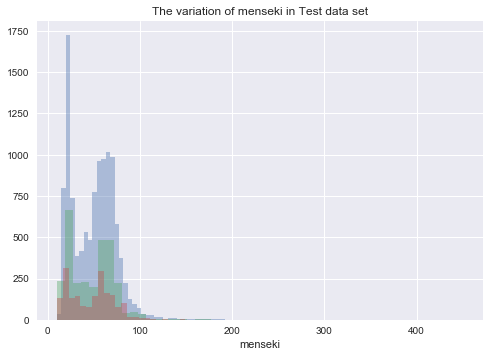

In [205]:
%matplotlib inline
import matplotlib as plt
import seaborn as sns
sns.set(color_codes=True)
sns.distplot(train.menseki, kde=False, rug=False)
sns.plt.title('The variation of menseki in Training data set')
sns.distplot(validation.menseki, kde=False, rug=False)
sns.plt.title('The variation of menseki in Validation data set')
sns.distplot(test.menseki, kde=False, rug=False)
sns.plt.title('The variation of menseki in Test data set')

We can observe a few outliers but menseki ranges between 0 and 400. We can check the min and maximum from tables below. The maximum is 450.

In [444]:
print('====training=====')
train.describe()
train.shape

====training=====


(11479, 93)

In [207]:
print('====validation=====')
validation.describe()


====validation=====


,ekikyori,price,menseki,kenpeiritsu,yousekiritsu,is_reformed,is_not_reformed,is_auction,is_direct_transaction,kenchiku_year,...,zoning_工業専用地域,zoning_準住居地域,zoning_準工業地域,zoning_第１種中高層住居専用地域,zoning_第１種低層住居専用地域,zoning_第１種住居地域,zoning_第２種中高層住居専用地域,zoning_第２種低層住居専用地域,zoning_第２種住居地域,zoning_近隣商業地域
count,2895.00000,2.895000e+03,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,...,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000
mean,7.66563,3.332950e+07,47.756477,0.687427,3.523765,0.249741,0.749914,0.007945,0.001727,1997.783074,...,0.000345,0.021071,0.196546,0.123316,0.036269,0.099482,0.024870,0.002763,0.037306,0.129534
std,6.39795,2.920084e+07,25.557727,0.105092,1.524028,0.432938,0.433137,0.088794,0.041530,12.189329,...,0.018586,0.143645,0.397455,0.328856,0.186992,0.299360,0.155757,0.052504,0.189543,0.335848
min,0.00000,1.000000e+06,10.000000,0.300000,0.600000,0.000000,0.000000,0.000000,0.000000,1963.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.00000,1.900000e+07,25.000000,0.600000,2.000000,0.000000,0.500000,0.000000,0.000000,1989.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.00000,2.700000e+07,50.000000,0.600000,3.000000,0.000000,1.000000,0.000000,0.000000,2001.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.00000,4.100000e+07,65.000000,0.800000,5.000000,0.000000,1.000000,0.000000,0.000000,2007.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,60.00000,7.500000e+08,450.000000,0.800000,9.000000,1.000000,1.000000,1.000000,1.000000,2016.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [208]:
print('====testing=====')
test.describe()

====testing=====


,ekikyori,price,menseki,kenpeiritsu,yousekiritsu,is_reformed,is_not_reformed,is_auction,is_direct_transaction,kenchiku_year,...,zoning_工業専用地域,zoning_準住居地域,zoning_準工業地域,zoning_第１種中高層住居専用地域,zoning_第１種低層住居専用地域,zoning_第１種住居地域,zoning_第２種中高層住居専用地域,zoning_第２種低層住居専用地域,zoning_第２種住居地域,zoning_近隣商業地域
count,1880.000000,1.880000e+03,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000,...,1880.0,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,7.515426,3.398229e+07,47.656915,0.686968,3.539894,0.269681,0.729787,0.012766,0.001064,1997.857979,...,0.0,0.015957,0.195213,0.137234,0.036170,0.092021,0.022340,0.000532,0.036170,0.128723
std,6.107323,2.466596e+07,23.976702,0.106146,1.553397,0.443912,0.444188,0.112293,0.032608,12.007783,...,0.0,0.125344,0.396470,0.344186,0.186763,0.289133,0.147827,0.023063,0.186763,0.334983
min,0.000000,1.000000e+06,10.000000,0.400000,0.800000,0.000000,0.000000,0.000000,0.000000,1950.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.900000e+07,25.000000,0.600000,2.000000,0.000000,0.000000,0.000000,0.000000,1990.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,2.800000e+07,50.000000,0.600000,3.000000,0.000000,1.000000,0.000000,0.000000,2001.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,4.200000e+07,65.000000,0.800000,5.000000,1.000000,1.000000,0.000000,0.000000,2007.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,60.000000,3.300000e+08,200.000000,0.800000,9.000000,1.000000,1.000000,1.000000,1.000000,2016.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [209]:
train.isnull().sum()

jiscode                  0
shi                      0
chiku                    0
eki                      0
ekikyori                 0
price                    0
madori                   0
menseki                  0
kenchikunen              0
kouzou                   0
youto                    0
mokuteki                 0
toshikeikaku             0
kenpeiritsu              0
yousekiritsu             0
torihiki_jiten           0
bikou                    0
is_reformed              0
is_not_reformed          0
is_auction               0
is_direct_transaction    0
kenchiku_year            0
transaction_year         0
age                      0
price_log10              0
bedrooms                 0
town_あきる野市               0
town_三鷹市                 0
town_世田谷区                0
town_中央区                 0
                        ..
town_福生市                 0
town_稲城市                 0
town_立川市                 0
town_練馬区                 0
town_羽村市                 0
town_荒川区                 0
t

# The distribution of Price and its correlation with other variables
The histogram of apartment price is concentrated to the left and is skewed to the right. It appears we have some outliers in the training data set.

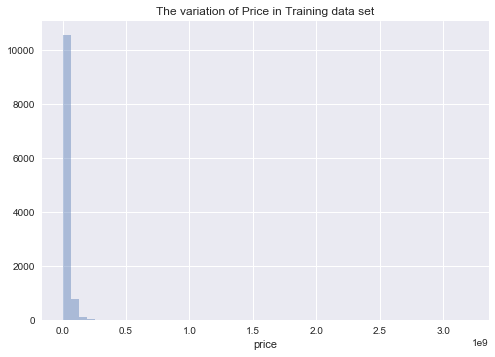

In [247]:
sns.distplot(train.price, kde=False, rug=False)
sns.plt.title('The variation of Price in Training data set')
sns.plt.savefig('hist_price.png')

The price varies a lot, and it is skewed. It is concentrated on the left tail, but some aparments are very expensive. The distribution can also be checked by the quantiles of the price.

In [251]:
train.describe()['price']/1000000.0

count       0.011479
mean       33.634348
std        43.432749
min         0.240000
25%        18.000000
50%        27.000000
75%        40.000000
max      3200.000000
Name: price, dtype: float64

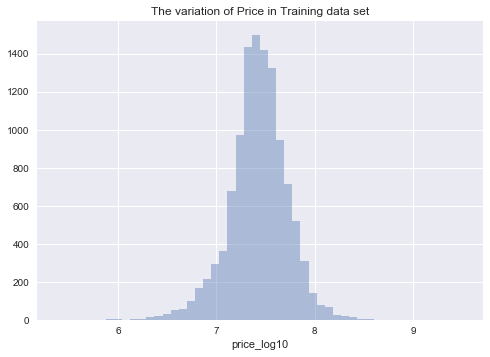

In [252]:
d['price_log10'] = np.log10(d.price)
train['price_log10'] = np.log10(train.price)
sns.distplot(train.price_log10, kde=False, rug=False)
sns.plt.title('The variation of Price in Training data set')
sns.plt.savefig('hist_log_price_train.png')

The graph shows the histogram of price in Log 10 scale, and it is symetric and looks normally distributed. We check the distribution of price with other variables.

Price is positively correlated with menseki. The larger the room is the higher the price is. Ekikyori does not look highly correlated with the price as we don't see any trend. When is_reformed = 1, the prices looks slightly higher. 

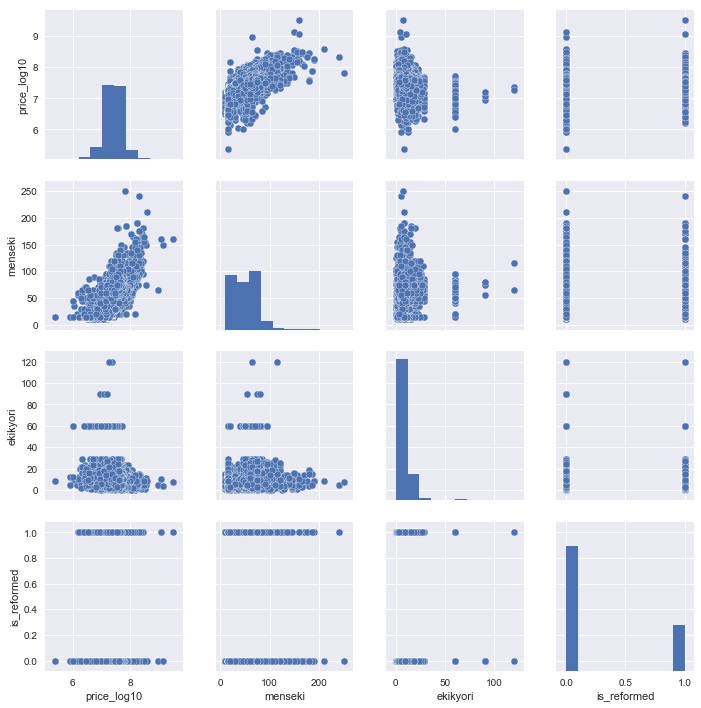

In [254]:
sns.pairplot(train[['price_log10','menseki','ekikyori','is_reformed','madori']])
sns.plt.savefig('pairs_log_price_train1.png')

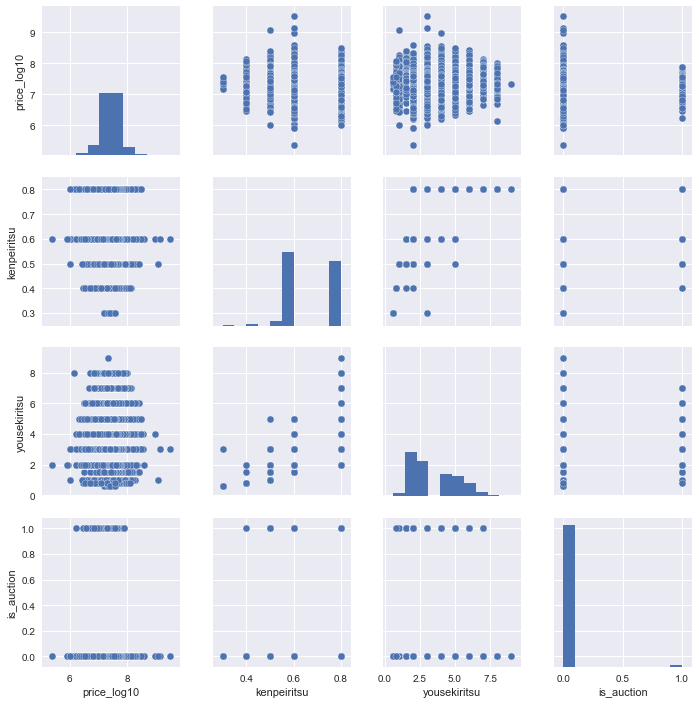

In [255]:
sns.pairplot(train[['price_log10','kouzou','youto','mokuteki','kenpeiritsu','yousekiritsu','bikou','is_auction']])
sns.plt.savefig('pairs_log_price_train2.png')

Kenpeiritsu and Yousekiritsu do not look correlated with the price very much. is_auction does not look correlated with price either, though the variance of the distribution of price is different for is_aucition = 0 and is_aucitin = 1.

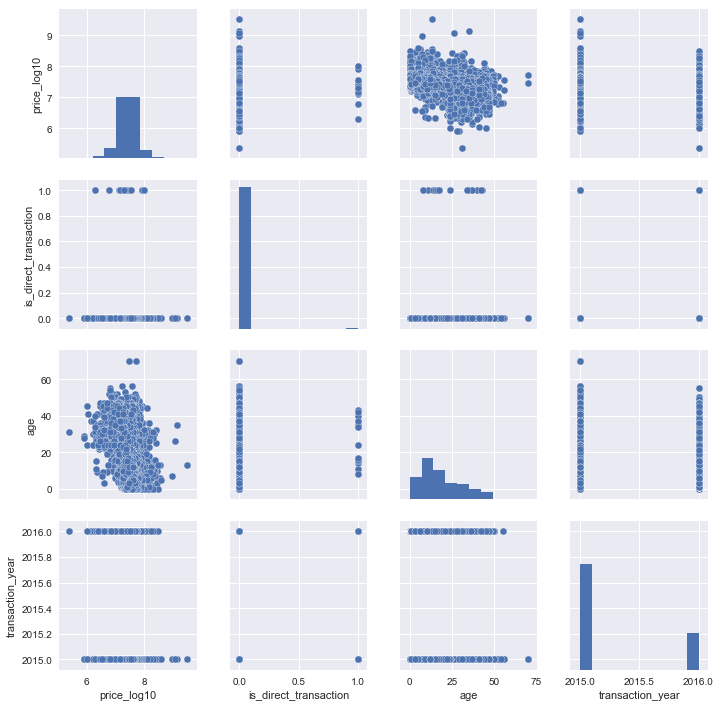

In [256]:
sns.pairplot(train[['price_log10','is_direct_transaction','age','transaction_year']])
sns.plt.savefig('pairs_log_price_train3.png')

A similar observation can be found for is_direct_transaction. It does not correlated but when is_direct = 1, the variation of the price is smaller than that of the price when is_direct = 0. For the transaction year, The price looks lower when the transaction year = 2016 than year 2015. As the age increases (i.e. apartment gets older), the price tends to be lower. 

# Benchmark model
We build a benchmark model by linear regression and calculate the MSE.

In [262]:
from itertools import chain
town_columns = train.columns[train.columns.str.startswith('town')]
material_columns = train.columns[train.columns.str.startswith('material')]
purpose_columns = train.columns[train.columns.str.startswith('purpose')]
zoning_columns = train.columns[train.columns.str.startswith('zoning')]

predicting_cols = ['menseki','ekikyori','is_reformed', 'bedrooms','kenpeiritsu','yousekiritsu','is_auction',
                  'is_direct_transaction','age','transaction_year']
for v in town_columns:
    predicting_cols.append(v)
for v in material_columns:
    predicting_cols.append(v)
for v in purpose_columns:
    predicting_cols.append(v)
for v in zoning_columns:
    predicting_cols.append(v)

print(predicting_cols)
print(len(predicting_cols))

['menseki', 'ekikyori', 'is_reformed', 'bedrooms', 'kenpeiritsu', 'yousekiritsu', 'is_auction', 'is_direct_transaction', 'age', 'transaction_year', 'town_あきる野市', 'town_三鷹市', 'town_世田谷区', 'town_中央区', 'town_中野区', 'town_八王子市', 'town_北区', 'town_千代田区', 'town_台東区', 'town_品川区', 'town_国分寺市', 'town_国立市', 'town_墨田区', 'town_多摩市', 'town_大田区', 'town_小平市', 'town_小金井市', 'town_府中市', 'town_文京区', 'town_新宿区', 'town_日野市', 'town_昭島市', 'town_杉並区', 'town_東久留米市', 'town_東大和市', 'town_東村山市', 'town_板橋区', 'town_武蔵村山市', 'town_武蔵野市', 'town_江戸川区', 'town_江東区', 'town_清瀬市', 'town_渋谷区', 'town_港区', 'town_狛江市', 'town_町田市', 'town_目黒区', 'town_福生市', 'town_稲城市', 'town_立川市', 'town_練馬区', 'town_羽村市', 'town_荒川区', 'town_葛飾区', 'town_西東京市', 'town_調布市', 'town_豊島区', 'town_足立区', 'town_青梅市', 'material_鉄骨造', 'material_ＲＣ', 'material_ＳＲＣ', 'purpose_その他', 'purpose_事務所', 'purpose_住宅', 'zoning_商業地域', 'zoning_工業地域', 'zoning_工業専用地域', 'zoning_準住居地域', 'zoning_準工業地域', 'zoning_第１種中高層住居専用地域', 'zoning_第１種低層住居専用地域', 'zoning_第１種住居地域', 'zoning_第２種中高層住居専

In [445]:
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

y = train.price_log10
X = train[predicting_cols]
y_val = validation.price_log10
X_val = validation[predicting_cols]
y_test = test.price_log10
X_test = test[predicting_cols]

lr = linear_model.LinearRegression()

lr.fit(X, y)
pred_train = lr.predict(X)
pred_val = lr.predict(X_val)
mse_train = mean_squared_error(pred_train, y)
mse_validation  = mean_squared_error(pred_val, y_val)

print("training MSE: {0:6.4f}  validation MSE: {1:6.4f}".format(mse_train, mse_validation))
print(X.shape)

training MSE: 0.0150  validation MSE: 0.0196
(11479, 77)


For the training, MSE is 0.015 and the validation MSE is 0.020.

### Building a Model: Random Forest
We build a model using Random Forest. We start with a simple RF model using the default parameter. We then tune the hyper-parameter using the cross validation method.

In [264]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X, y)

pred_train = rf.predict(X)
pred_val = rf.predict(X_val)
mse_train = mean_squared_error(pred_train, y)
mse_validation  = mean_squared_error(pred_val, y_val)
print("training MSE: {0:6.4f}  validation MSE: {1:6.4f}".format(mse_train, mse_validation))

training MSE: 0.0031  validation MSE: 0.0161


Using RF model reduced MSE from 0.015 to 0.003 for training, but the validation MSE remained almost the same and changed from 0.0196 to 0.016.

Now we update the hyper parameters of the model.



In [271]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

parameters = {'n_estimators':[10, 50, 100, 500]}

clf = RandomForestRegressor(n_estimators=100)
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

grid_obj = grid_obj.fit(X, y)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print("Tuned model has a training F1 score of {:.4f}.".format(mean_squared_error(clf.predict(X), y)))
print("Tuned model has a testing F1 score of {:.4f}.".format(mean_squared_error(clf.predict(X_val), y_val)))

#rf.fit(X, y)

#pred_train = rf.predict(X)
#pred_val = rf.predict(X_val)
#mse_train = mean_squared_error(pred_train, y)
#mse_validation  = mean_squared_error(pred_val, y_val)
#print("training MSE: {0:6.4f}  validation MSE: {1:6.4f}".format(mse_train, mse_validation))

Tuned model has a training F1 score of 0.0022.
Tuned model has a testing F1 score of 0.0147.


In [443]:
grid_obj.best_params_

{'n_estimators': 500}

In [451]:
from sklearn.model_selection import RandomizedSearchCV
from time import time
from scipy.stats import randint as sp_randint

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

"""
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(1, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
"""
param_dist = {"max_depth": sp_randint(1, 100),
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False]}
"""
param_dist = {"max_depth": [None, 70],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False]}
"""

clf = RandomForestRegressor(n_estimators=500, random_state=32)

n_iter_search = 100
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, random_state=893, 
                                  n_jobs=-1, cv = 5, scoring='neg_mean_squared_error')

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 791.02 seconds for 100 candidates parameter settings.
Model with rank: 1
Mean validation score: -0.036 (std: 0.020)
Parameters: {'bootstrap': False, 'max_features': 10, 'max_depth': 96, 'min_samples_leaf': 1, 'min_samples_split': 8}

Model with rank: 2
Mean validation score: -0.037 (std: 0.020)
Parameters: {'bootstrap': False, 'max_features': 8, 'max_depth': 61, 'min_samples_leaf': 1, 'min_samples_split': 4}

Model with rank: 3
Mean validation score: -0.037 (std: 0.021)
Parameters: {'bootstrap': False, 'max_features': 7, 'max_depth': 95, 'min_samples_leaf': 1, 'min_samples_split': 9}



In [452]:
#clf_final = RandomForestRegressor(n_estimators=500, random_state=32, max_features=7, max_depth=None,
#                           min_samples_leaf = 1, min_samples_split = 4, bootstrap=False)
#clf_final = RandomForestRegressor(n_estimators=500, random_state=32, max_features=9, max_depth=70,
#                           min_samples_leaf = 2, min_samples_split = 10, bootstrap=True)
#clf_final = RandomForestRegressor(n_estimators=500, random_state=32, max_features=7, max_depth=70,
#                           min_samples_leaf = 1, min_samples_split = 4, bootstrap=False)
clf_final = RandomForestRegressor(n_estimators=500, random_state=32, max_features=8, max_depth=96,
                           min_samples_leaf = 1, min_samples_split = 8, bootstrap=False)


clf_final.fit(X, y)
print("Tuned model has a training MSE of {:.4f}.".format(mean_squared_error(clf_final.predict(X), y)))
print("Tuned model has a validation MSE score of {:.4f}.".format(mean_squared_error(clf_final.predict(X_val), y_val)))

Tuned model has a training MSE of 0.0042.
Tuned model has a validation MSE score of 0.0138.


In [284]:
(0.0196 - 0.0137)/0.0196


0.30102040816326525

## The performance on the test data set
Use the final data set to predict the performance on the test data set.

In [453]:
print("Tuned model has a testing MSE score of {:.4f}.".format(mean_squared_error(clf_final.predict(X_test), y_test)))

Tuned model has a testing MSE score of 0.0154.


## Model evaluation
We look at the robustness of the model. First check the important features and see whether they make sense.

Feature ranking:
1. feature menseki (0.298895)
2. feature age (0.211932)
3. feature bedrooms (0.106316)
4. feature ekikyori (0.051499)
5. feature yousekiritsu (0.032292)
6. feature town_港区 (0.030137)
7. feature town_八王子市 (0.015644)
8. feature is_reformed (0.015554)
9. feature town_青梅市 (0.014411)
10. feature town_足立区 (0.010930)
11. feature kenpeiritsu (0.008967)
12. feature town_世田谷区 (0.008946)
13. feature town_渋谷区 (0.008437)
14. feature material_ＲＣ (0.007768)
15. feature material_ＳＲＣ (0.007597)
16. feature zoning_第２種住居地域 (0.007243)
17. feature transaction_year (0.006831)
18. feature town_品川区 (0.006795)
19. feature town_中央区 (0.006357)
20. feature town_目黒区 (0.005652)
21. feature town_葛飾区 (0.005488)
22. feature zoning_商業地域 (0.005360)
23. feature zoning_第１種中高層住居専用地域 (0.005358)
24. feature town_新宿区 (0.005318)
25. feature zoning_準工業地域 (0.005289)
26. feature zoning_第１種低層住居専用地域 (0.005146)
27. feature town_立川市 (0.005048)
28. feature town_江東区 (0.004402)
29. feature town_大田区 (0.004182)
30. featur

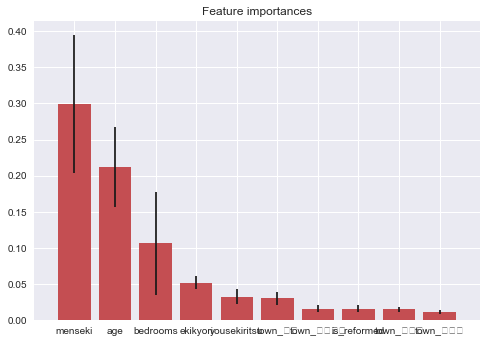

In [297]:
importances = clf_final.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_final.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
#plt.bar(range(X.shape[1]), importances[indices],
#       color="r", yerr=std[indices], align="center")
plt.bar(range(10), importances[indices][:10],
       color="r", yerr=std[indices][:10], align="center")
#plt.xticks(range(X.shape[1]), indices)
#plt.xlim([-1, X.shape[1]])
plt.xticks(range(10), X.columns[indices[:10]])
plt.xlim([-1, 10])
plt.show()


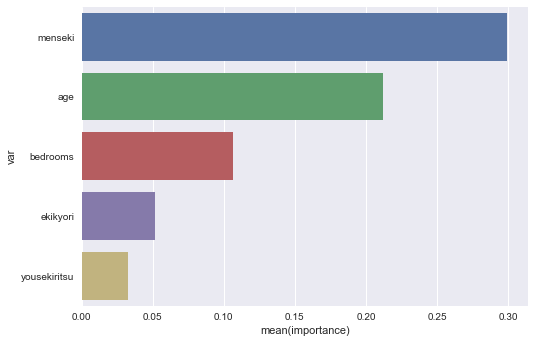

In [307]:
df_importance = pd.DataFrame({'var':X.columns[indices], 'importance':importances[indices], 'std':std[indices] })
df_importance.head(5)
sns.barplot(y='var', x='importance', data=df_importance.head(5))
sns.plt.savefig('bar_five_most_important_features.png')

Menseki (size of room), Age, # of bedrooms, Ekikyori (walking distance from the nearest station), Yosekiritsu (Floor Area Ratio) are the five most important features to predict the price. These variables make sense. As the size of the room increases, the price would also increase. The number of bedrooms is similar to the size of the room, so it also correlates with the price. We can expect that the price will be lower as the apartment gets older. The walking distance from the nearest station should measure how convenient for residents to commute, so it can be expacted to be negatively correlated with the price.

We can check if the model comforms with these expectations. The random forest model does not return a specific formula, but we can check the correlation by changing one variable while keeping the other variables fixed.

In [324]:
X0 = X.iloc[0]
X0
#clf_final.predict(X_test)

menseki                    65.0
ekikyori                    4.0
is_reformed                 0.0
bedrooms                    2.0
kenpeiritsu                 0.8
yousekiritsu                5.0
is_auction                  0.0
is_direct_transaction       0.0
age                         9.0
transaction_year         2016.0
town_あきる野市                  0.0
town_三鷹市                    0.0
town_世田谷区                   0.0
town_中央区                    0.0
town_中野区                    0.0
town_八王子市                   0.0
town_北区                     0.0
town_千代田区                   1.0
town_台東区                    0.0
town_品川区                    0.0
town_国分寺市                   0.0
town_国立市                    0.0
town_墨田区                    0.0
town_多摩市                    0.0
town_大田区                    0.0
town_小平市                    0.0
town_小金井市                   0.0
town_府中市                    0.0
town_文京区                    0.0
town_新宿区                    0.0
                          ...  
town_福生市

We use the first record in the training data as the base record. It has the room size 65 square meters. We check if the predicted price increases when we set a large room size. We test this by increasing it to 75 square meters.

In [327]:
X1 = X.iloc[0]
X1.menseki = 75
print(X0.menseki, X1.menseki)
y_small_menseki = clf_final.predict(X0)
y_large_menseki = clf_final.predict(X1)

print("Predicted Price: 65 m2 {:.4f}   75 m2 {:.4f}  diff%{:.4f}.".format(np.exp(y_small_menseki[0]), np.exp(y_large_menseki[0]), 
                                                                         np.exp(y_large_menseki[0])/np.exp(y_small_menseki[0])-1))

65.0 75.0
Predicted Price: 65 m2 2638.5788   75 m2 2740.2395  diff%0.0385.


//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.


The predicted price for an aparment with 65 square meters is 26,385,788 JPY. If the size of the same room were to increase to 75 square meters, the model would predict that the price would be 27,402,395 JPY, which is an increase of 3.85%. 
We repeat the same for the other four variables.

In [329]:
X_age = X.iloc[0]
X_bedrooms = X.iloc[0]
X_ekikyori = X.iloc[0]
X_far = X.iloc[0]

X.iloc[0][['menseki','age', 'ekikyori','bedrooms','yousekiritsu']]

menseki         65.0
age              9.0
ekikyori         4.0
bedrooms         2.0
yousekiritsu     5.0
Name: 4, dtype: float64

In [429]:
X_bedrooms.bedrooms = 3.0
X_age.age = 15.0
X_ekikyori.ekikyori = 10.0
X_far.yousekiritsu = 2.0

y_base = np.exp(clf_final.predict(X.iloc[0]))
y_large_bedrooms = np.exp(clf_final.predict(X_bedrooms))
y_old_age = np.exp(clf_final.predict(X_age))
y_far_ekikyori = np.exp(clf_final.predict(X_ekikyori))
y_small_far = np.exp(clf_final.predict(X_far))

print("Base Price: {:.1f}".format(y_base[0]*10000))

print("Base #Bedrooms: {}  Comparison #Bedrooms: {}  Predicted Price: {:.1f}   Diff%: {:.4f}".format(
    X.iloc[0].bedrooms,
    X_bedrooms.bedrooms,
    y_large_bedrooms[0]*10000,
    y_large_bedrooms[0]/y_base[0]-1.0
     ))

print("Base Age: {}  Comparison Age: {}  Predicted Price: {:.1f}   Diff%: {:.4f}".format(
    X.iloc[0].age,
    X_age.age,
    y_old_age[0]*10000,
    y_old_age[0]/y_base[0]-1.0
     ))

print("Base Distance: {}  Comparison Distance: {}  Predicted Price: {:.1f}   Diff%: {:.4f}".format(
    X.iloc[0].ekikyori,
    X_ekikyori.ekikyori,
    y_far_ekikyori[0]*10000,
    y_far_ekikyori[0]/y_base[0]-1.0
     ))

print("Base FAR: {}  Comparison FAR: {}  Predicted Price: {:.1f}   Diff%: {:.4f}".format(
    X.iloc[0].yousekiritsu,
    X_far.yousekiritsu,
    y_small_far[0]*10000,
    y_small_far[0]/y_base[0]-1.0
     ))


//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


Base Price: 26385788.4
Base #Bedrooms: 2.0  Comparison #Bedrooms: 3.0  Predicted Price: 25701211.7   Diff%: -0.0259
Base Age: 9.0  Comparison Age: 15.0  Predicted Price: 24488229.9   Diff%: -0.0719
Base Distance: 4.0  Comparison Distance: 10.0  Predicted Price: 24205063.4   Diff%: -0.0826
Base FAR: 5.0  Comparison FAR: 2.0  Predicted Price: 22416152.9   Diff%: -0.1504


//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/envs/mlnd-capstone/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if i

## Error distribution
We check how the difference between the predicted and the actual price are disributed.

In [403]:
error_final_test = np.exp(clf_final.predict(X_test))*0.01 - np.exp(y_test)*0.01
error_benchmark_test = np.exp(lr.predict(X_test))*0.01 - np.exp(y_test)*0.01
#error_final_test = clf_final.predict(X_test) - y_test
#error_benchmark_test = lr.predict(X_test) - y_test

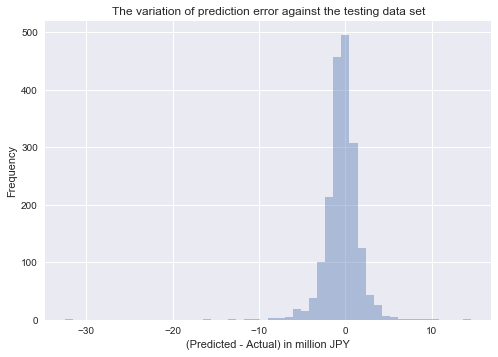

In [407]:
sns.set(color_codes=True)
sns.distplot(error_final_test, kde=False, rug=False)
sns.plt.title('The variation of prediction error against the testing data set')
sns.plt.xlabel('(Predicted - Actual) in million JPY')
sns.plt.ylabel('Frequency')
sns.plt.savefig('hist_prediction_error_test_final_model.png')

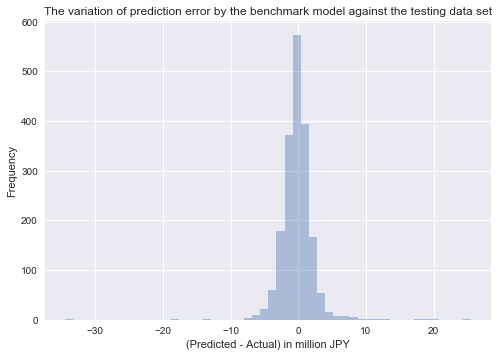

In [408]:
sns.distplot(error_benchmark_test, kde=False, rug=False)
sns.plt.title('The variation of prediction error by the benchmark model against the testing data set')
sns.plt.xlabel('(Predicted - Actual) in million JPY')
sns.plt.ylabel('Frequency')
sns.plt.savefig('hist_prediction_error_test_benchmark_model.png')

The distributions of the prediction errors look similar for the benchmark model and the final random forest model. The difference can be observed in the upper tail of the graph. The benchmark linear model has a few observations exceeding 2000, and these over-estimated records improved with the final model.

## Conclusion
### Free-Form visualisation

We add a scatterplot between the acutal and predicted values to see how it perfoms visually.


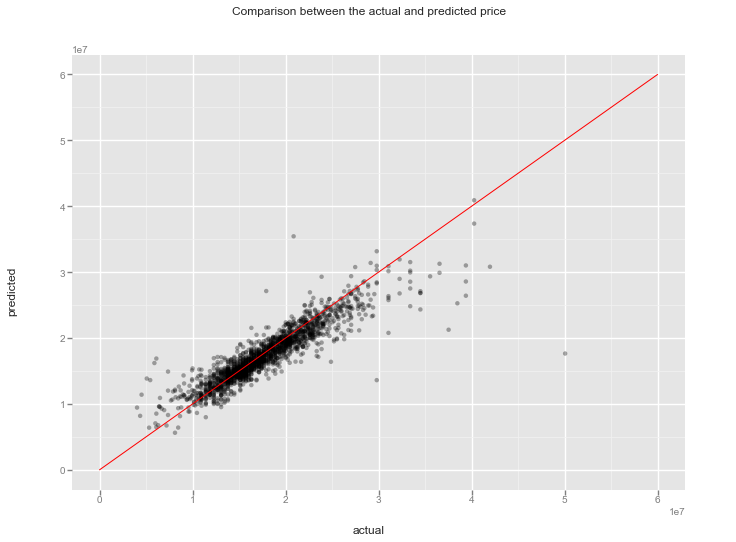

<ggplot: (-9223372036393601336)>

In [432]:
from ggplot import *
# prediction and actual in JPY. The data are denoted in 10000 JPY.
df_test = pd.DataFrame({'actual':np.exp(y_test)*10000, 'predicted':np.exp(clf_final.predict(X_test))*10000})
#df_test.head(3)
#sns.regplot(x="actual", y="predicted", data=df_test, fit_reg=False)
plt_scatter_final = ggplot(df_test, aes('actual', 'predicted')) + geom_point(alpha=1/3) + geom_abline(intercept=0, slope=1, color='red') +\
    scale_x_continuous(limit=(0, 55000000)) + \
    scale_y_continuous(limit=(0, 55000000)) + \
    labs(title = 'Comparison between the actual and predicted price')
plt_scatter_final.save('scatter_predict_actual_comparison.png')
plt_scatter_final


### challenging and interesting aspects
One of the challenging problems is to predict outliers. Apartments are different. We check the characteristics of apartments whose prediction errors were large.

In [422]:
# predict - actual: negative => under-estimate
# five most 
print(error_final_test.sort_values().head(5))
print(error_final_test.sort_values(ascending=False).head(5))


id
100559   -32.414514
10481    -16.272418
193714   -16.196765
17967    -13.206671
51114    -12.969012
Name: price_log10, dtype: float64
id
6246      14.570378
140017    10.778715
274889    10.310091
7678       9.209542
201733     8.776180
Name: price_log10, dtype: float64


In [428]:
X_test.ix[100559]
print(test.ix[[10481,100559]])

       jiscode  shi chiku     eki  ekikyori      price   madori  menseki  \
id                                                                         
10481    13103   港区   南青山     表参道       6.0  170000000  オープンフロア      140   
100559   13114  中野区    本町  西新宿五丁目       6.0  330000000     ２ＬＤＫ       50   

       kenchikunen kouzou      ...       zoning_工業専用地域 zoning_準住居地域  \
id                             ...                                    
10481        昭和47年    ＳＲＣ      ...                   0            0   
100559       昭和47年    ＳＲＣ      ...                   0            0   

       zoning_準工業地域  zoning_第１種中高層住居専用地域  zoning_第１種低層住居専用地域 zoning_第１種住居地域  \
id                                                                            
10481             0                    0                   0              0   
100559            0                    0                   0              0   

       zoning_第２種中高層住居専用地域  zoning_第２種低層住居専用地域  zoning_第２種住居地域  zoning_近隣商業地域  
id           

These records have price 10 million JPY althogh they are very old. It is not clear whether these prices are incorrectly input or they are correct and have special features that make the apartments highly expensive.